### Aim: To predict the percentage of marks of a student based on the number of study hours

###    V.Abhinaya

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
ds=pd.read_csv('task1_dataset.csv')
ds

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking for null values

In [4]:
ds.isnull().any()

Hours     False
Scores    False
dtype: bool

### Checking for the outliers

In [5]:
import seaborn as sns

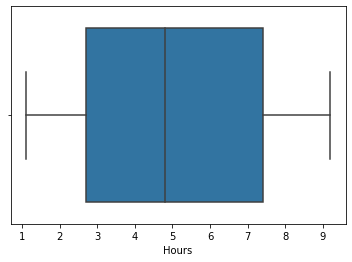

In [6]:
sns.boxplot(x=ds['Hours'])

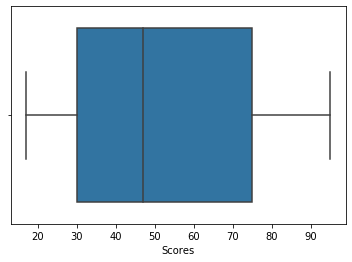

In [7]:
sns.boxplot(ds['Scores'])

### Separating the dependent and independent variables

In [8]:
x=ds.iloc[:,0:1].values

In [9]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y=ds.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

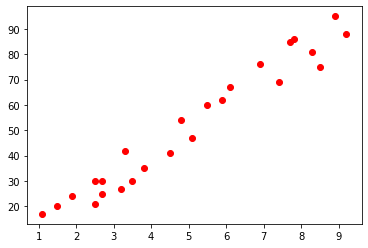

In [11]:
plt.scatter(x,y,color='red')

### Splitting the dataset into train and test datasets

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [13]:
x_train.shape

(20, 1)

In [14]:
y_train.shape

(20,)

In [15]:
x_test.shape

(5, 1)

In [16]:
y_test.shape

(5,)

### Importing and implementing the linear regression model

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred=lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

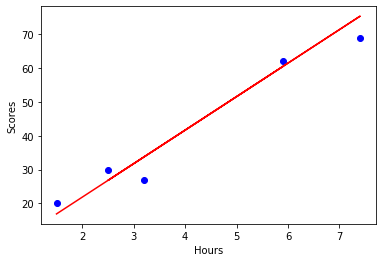

In [20]:
#comparing the predicted values with original values in the dataset for the given test dataset
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred,color='red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Predicting the score of the student who reads 9.25hrs/day

In [21]:
lr.predict([[9.25]])

array([93.69173249])

In [22]:
#calculating the accuracy score of the model
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9546785947197246